In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
df = pd.read_csv('/content/sample_data/rock_density_xray.csv')

In [7]:
df.columns = ['Signal','Density']

<Axes: xlabel='Signal', ylabel='Density'>

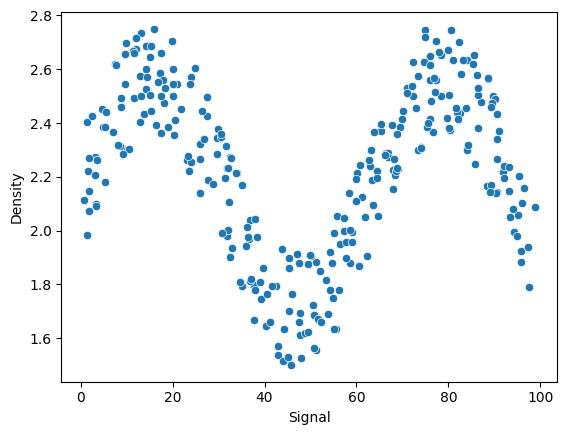

In [8]:
sns.scatterplot(data=df,x='Signal',y='Density')

In [9]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density'].values.reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [14]:
lin_model = LinearRegression()

In [15]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred_lin = lin_model.predict(X_test)

In [21]:
np.sqrt(mean_squared_error(y_test,y_pred_lin))

np.float64(0.2570051996584629)

In [22]:
mean_absolute_error(y_test,y_pred_lin)

0.211198973318633

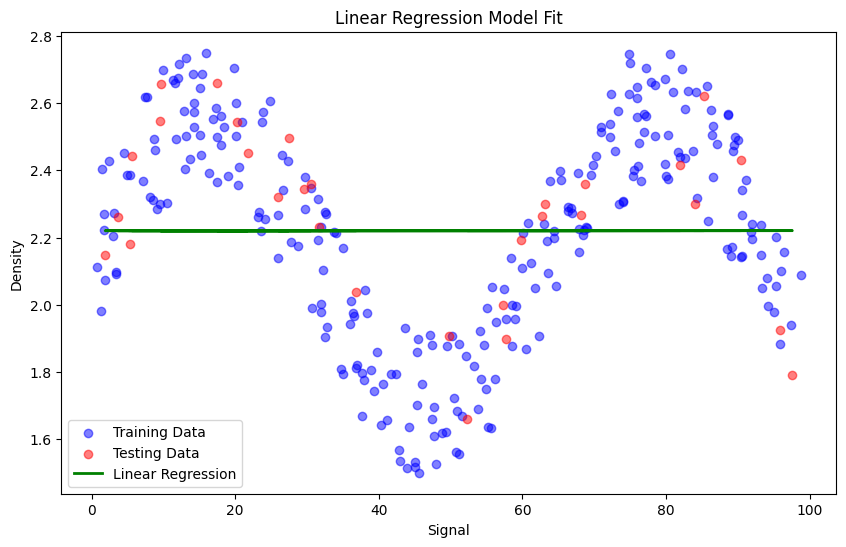

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.5)
plt.scatter(X_test, y_test, color='red', label='Testing Data', alpha=0.5)
plt.plot(X_test, y_pred_lin, color='green', linewidth=2, label='Linear Regression')
plt.xlabel('Signal')
plt.ylabel('Density')
plt.title('Linear Regression Model Fit')
plt.legend()
plt.show()

In [23]:
signal_range = np.arange(0,100)

In [25]:
signal_preds = lin_model.predict(signal_range.reshape(-1,1))

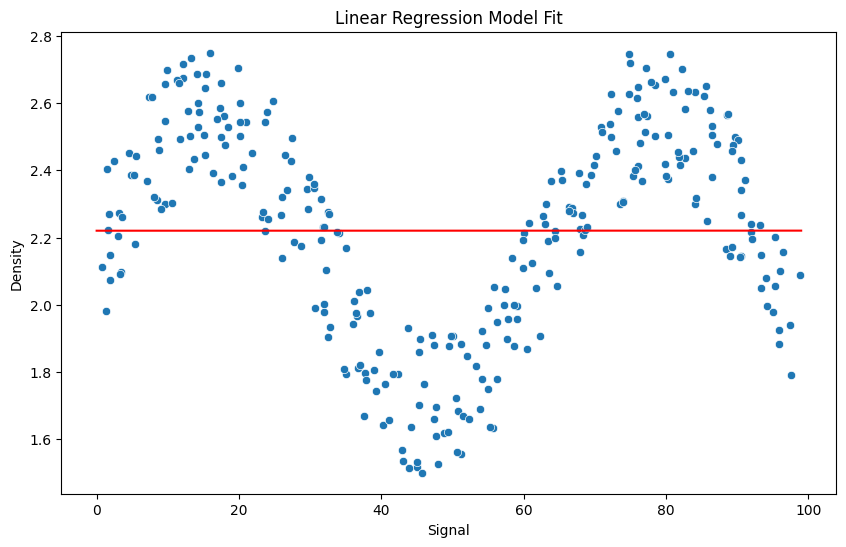

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Signal',y='Density',data=df)

plt.plot(signal_range,signal_preds,color='red')
plt.xlabel('Signal')
plt.ylabel('Density')
plt.title('Linear Regression Model Fit')
plt.show()

In [27]:
def run_model(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  print(f'RMSE: {rmse}')
  mae = mean_absolute_error(y_test,y_pred)
  print(f'MAE: {mae}')

  signal_range = np.arange(0,100)
  signal_preds = model.predict(signal_range.reshape(-1,1))

  plt.figure(figsize=(10, 6),dpi=225)
  sns.scatterplot(x='Signal',y='Density',data=df)

  plt.plot(signal_range,signal_preds,color='red')
  plt.xlabel('Signal')
  plt.ylabel('Density')
  plt.title('Linear Regression Model Fit')
  plt.show()

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [45]:
pipe = make_pipeline(PolynomialFeatures(degree=7),LinearRegression())

RMSE: 0.1352646206060586
MAE: 0.11916591247612172


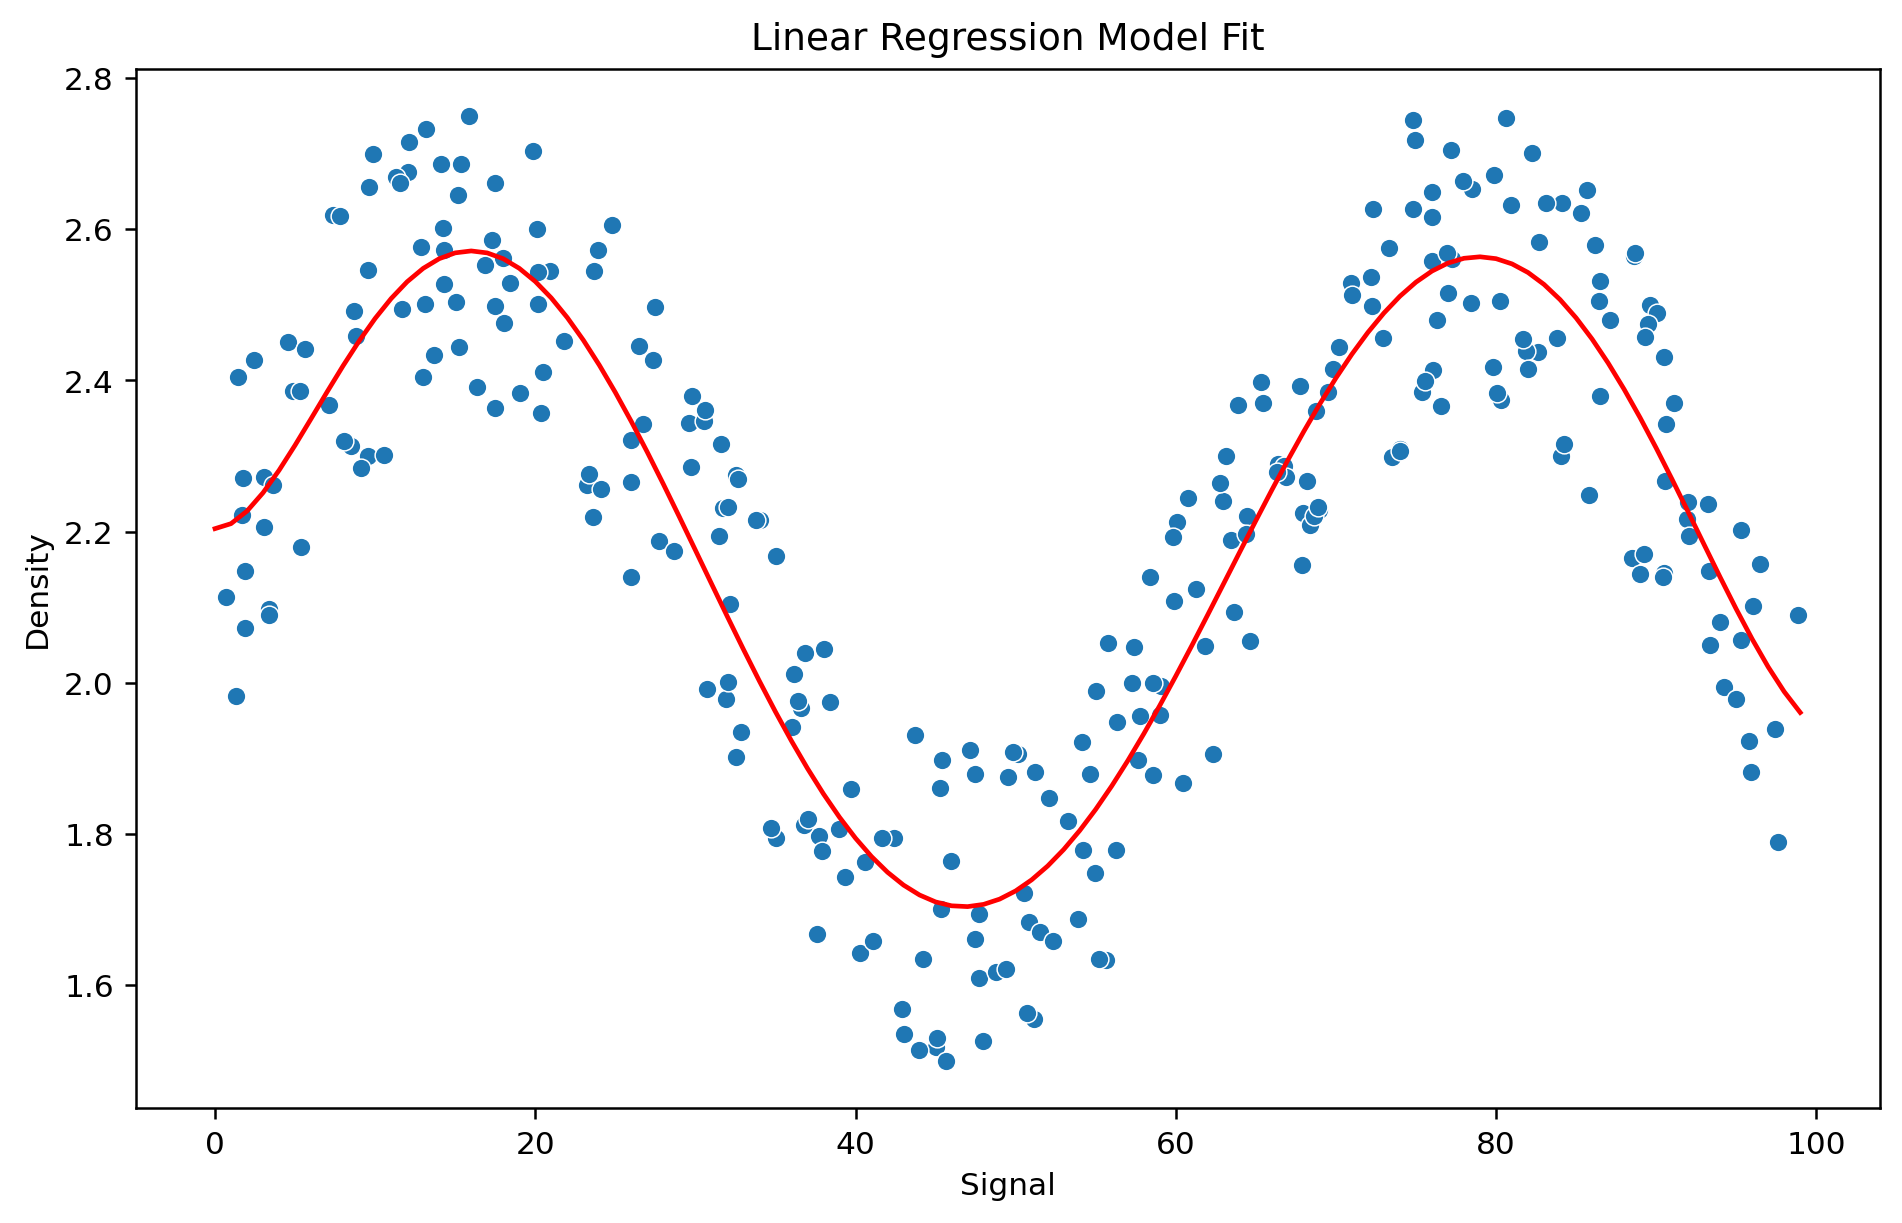

In [46]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


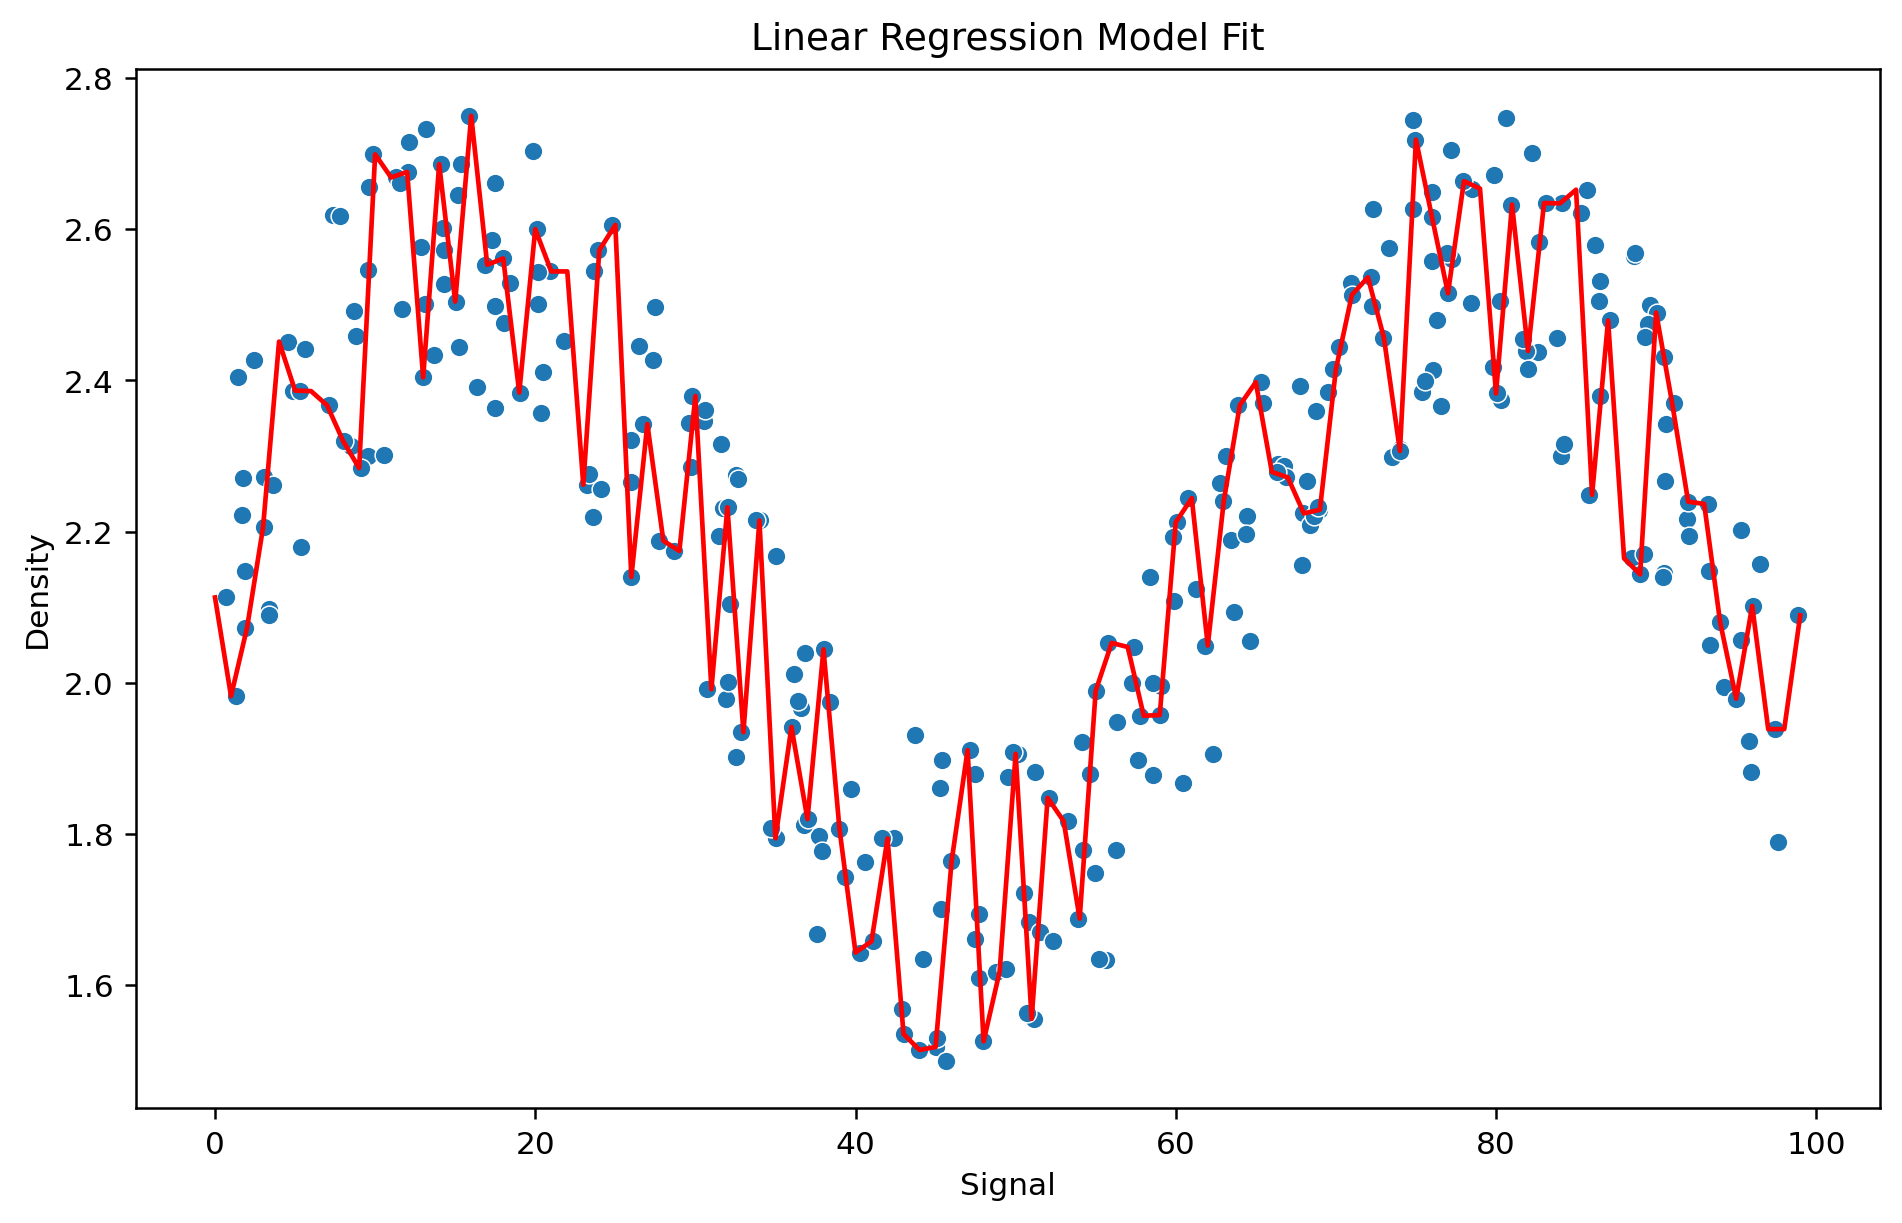

RMSE: 0.13730685016923647
MAE: 0.12198383614100558


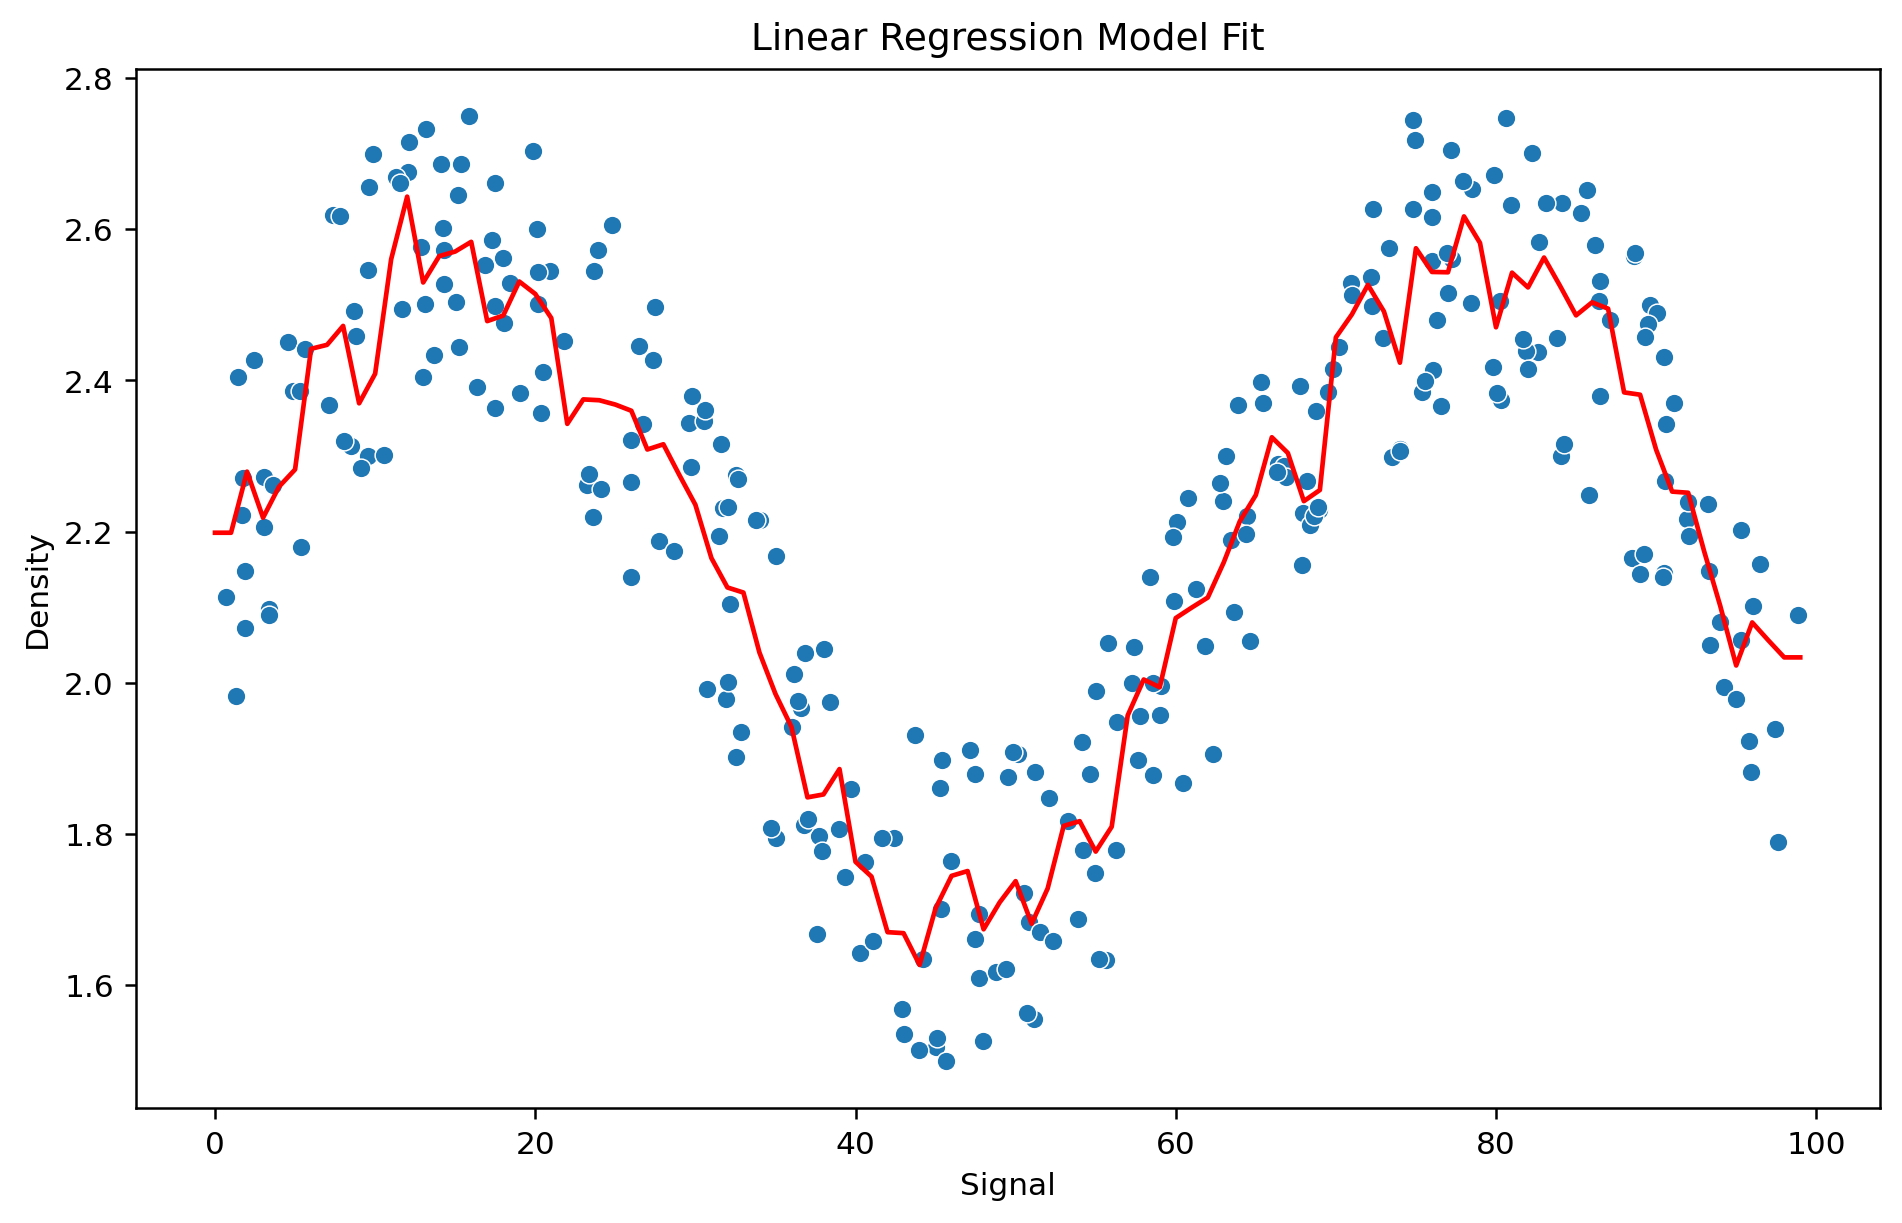

RMSE: 0.13277855732740926
MAE: 0.11635971693292672


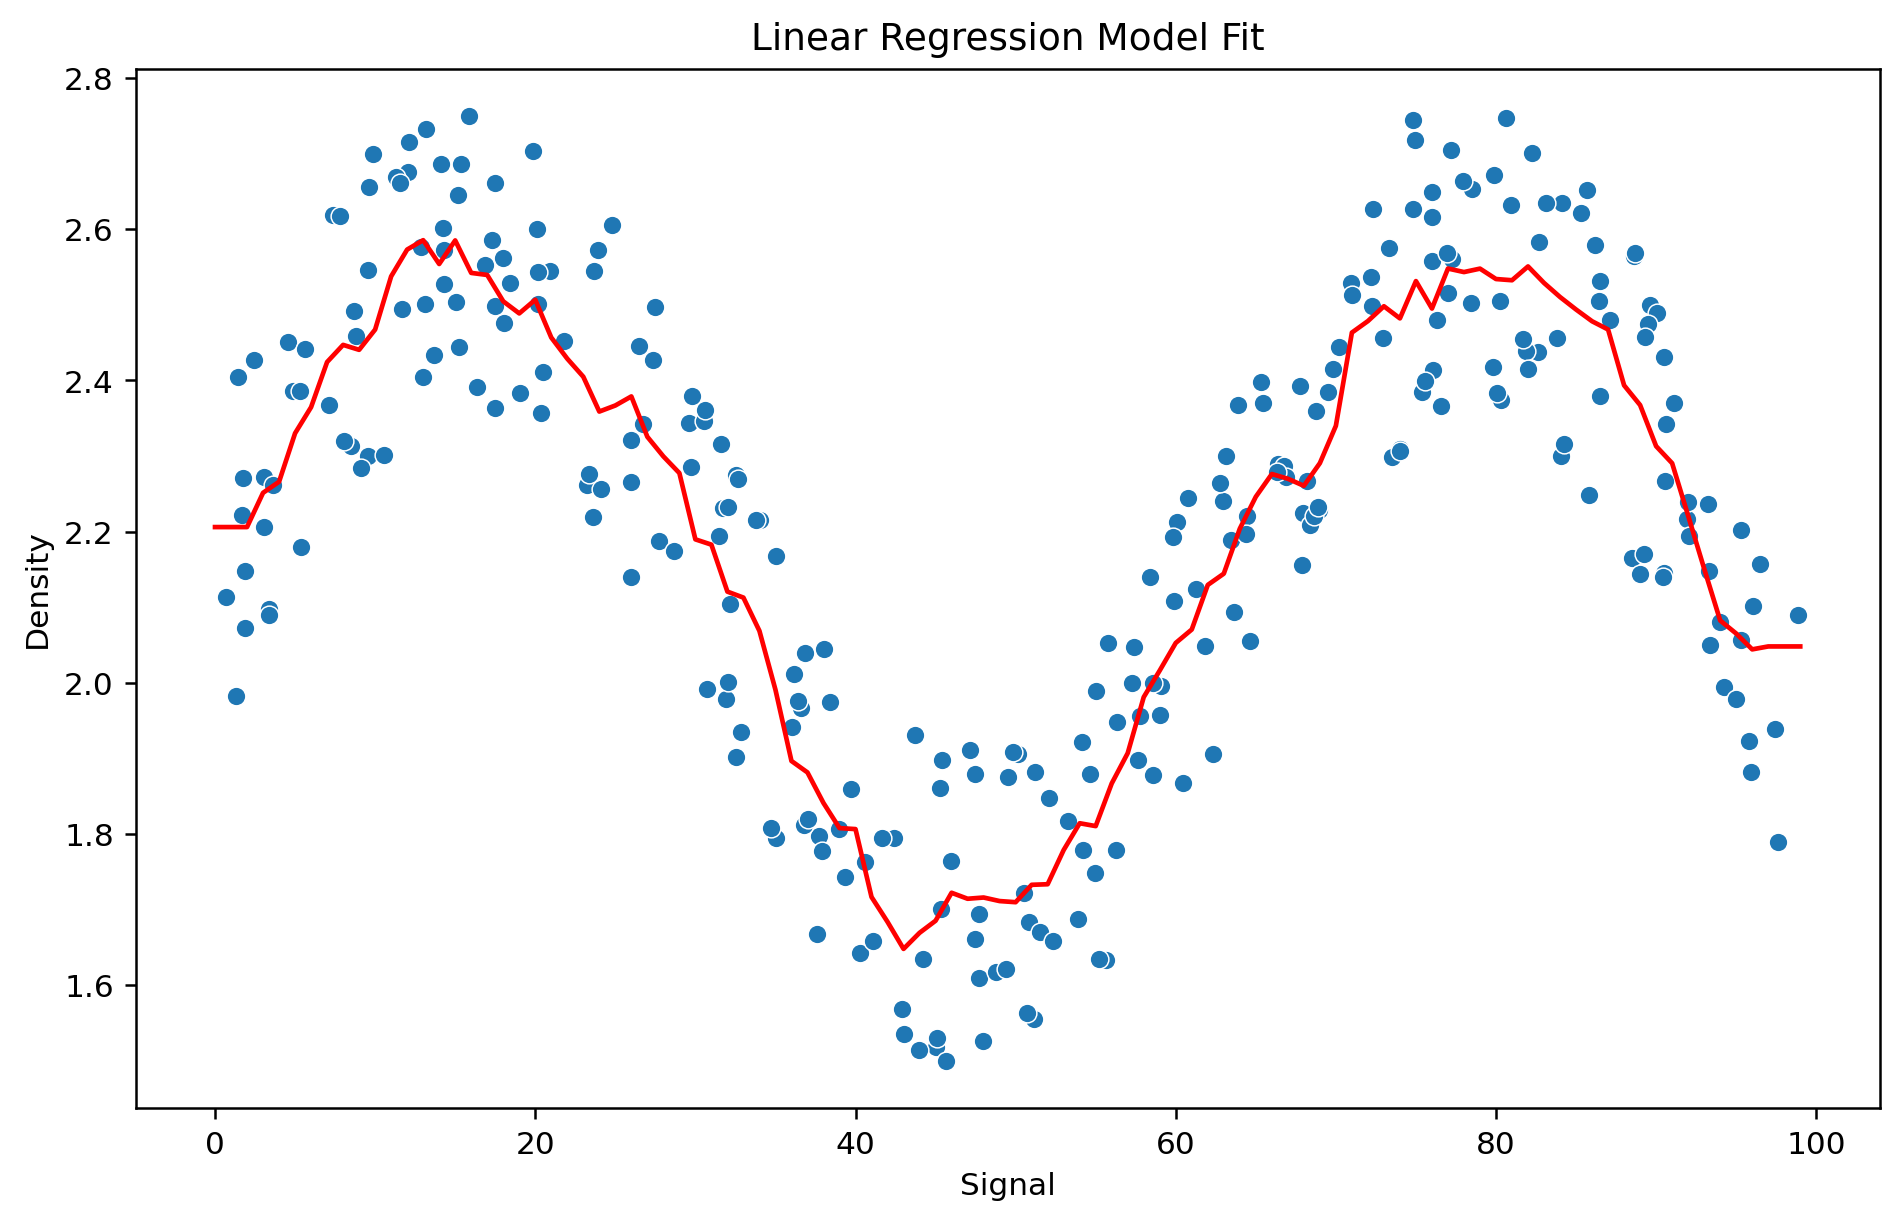

RMSE: 0.151321497164368
MAE: 0.12878322504026188


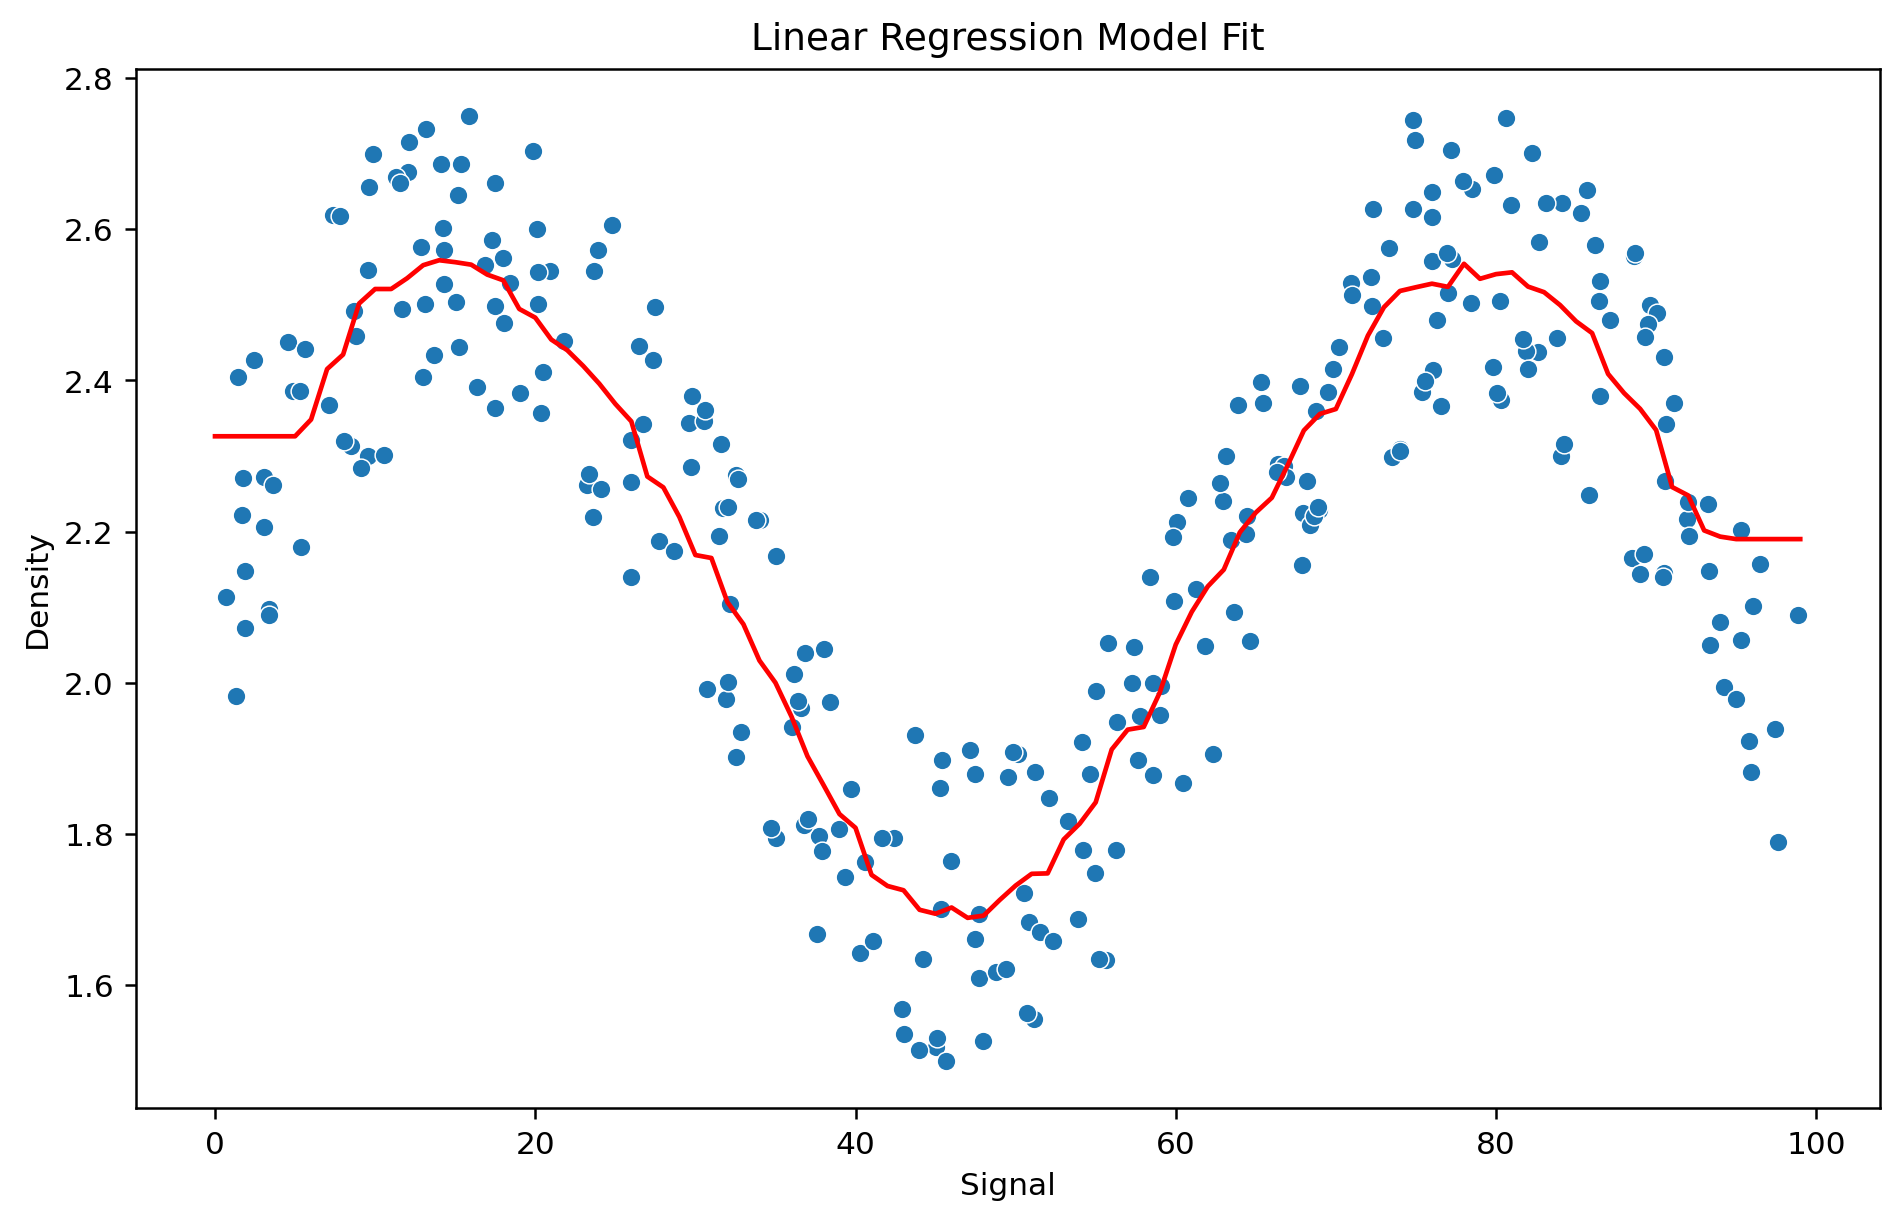

In [50]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [1,5,10,25]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


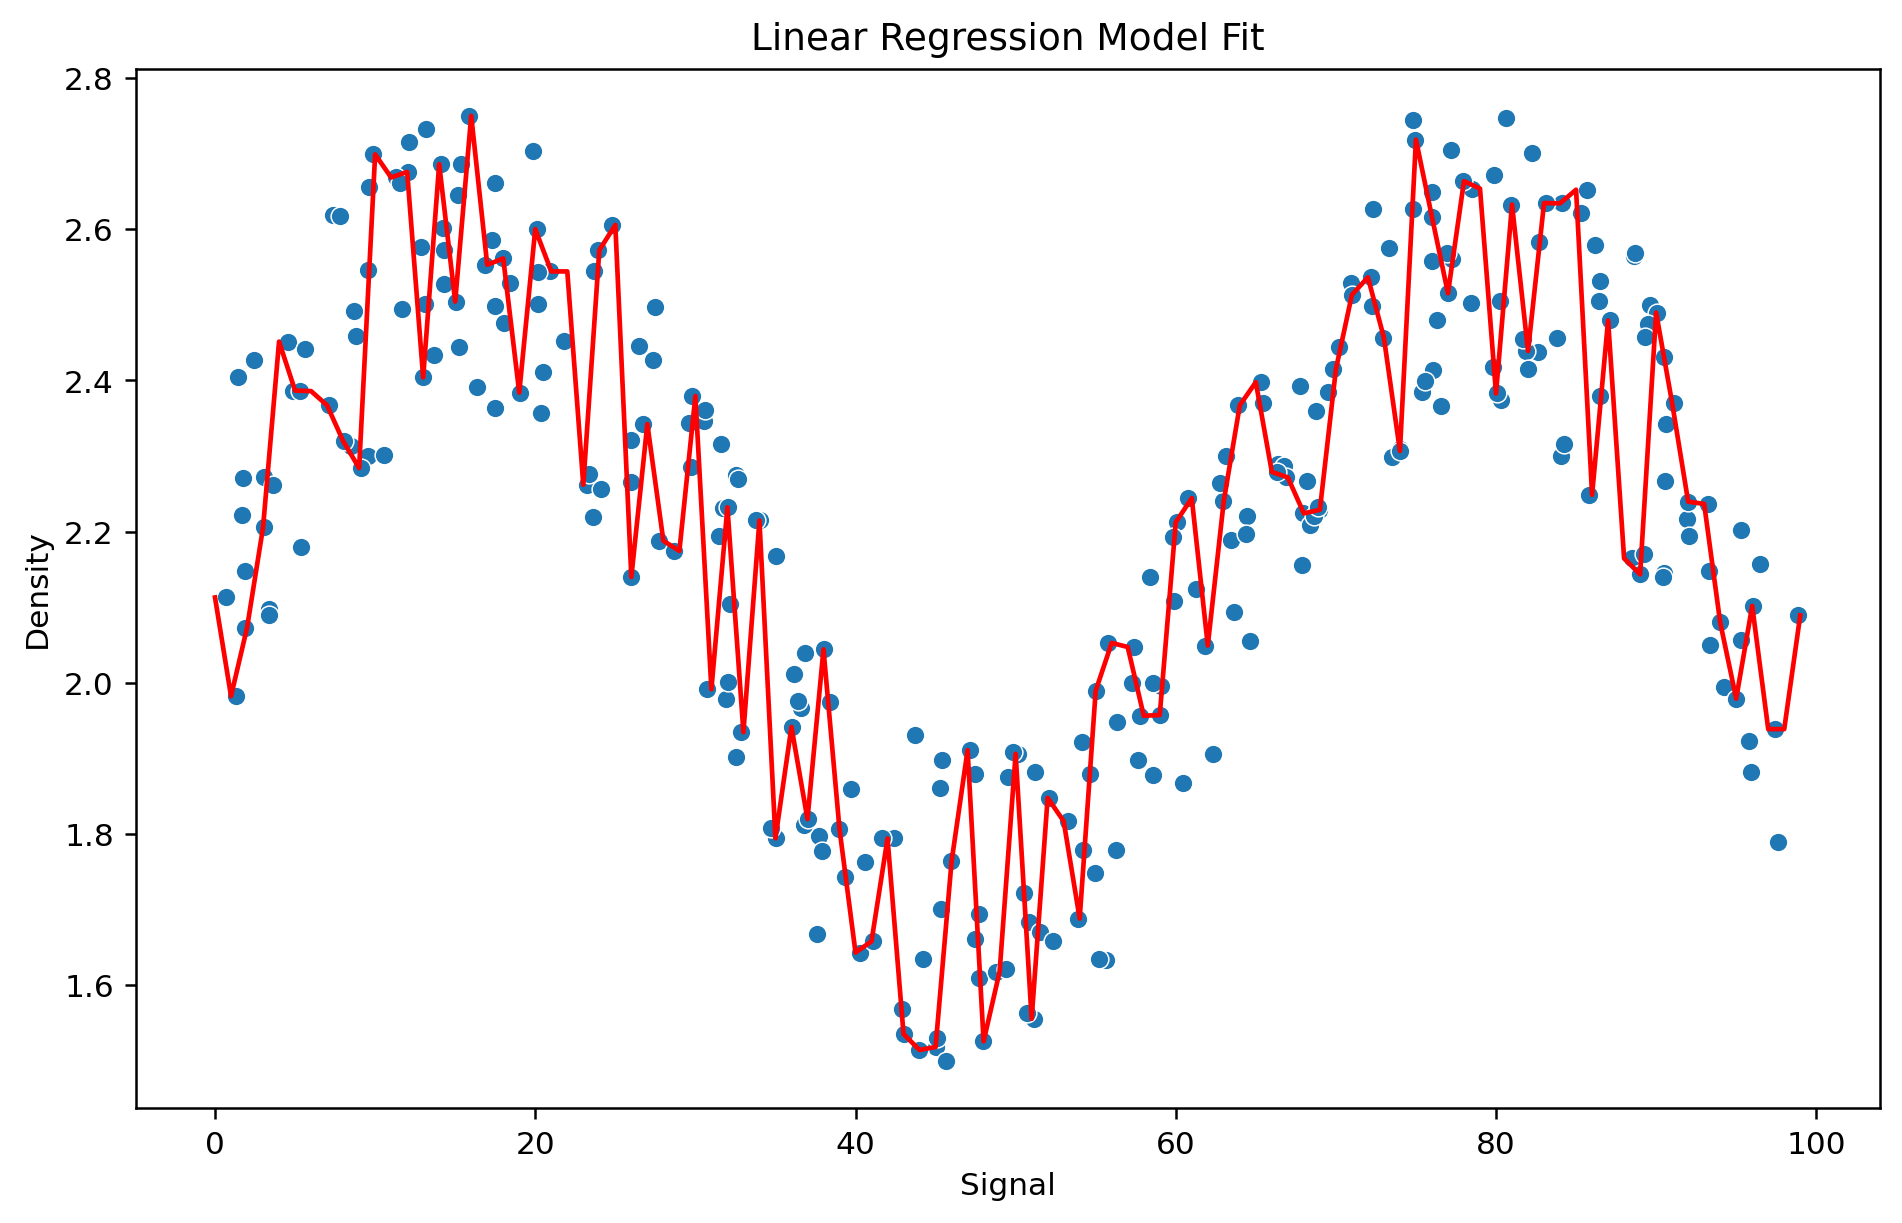

In [53]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [54]:
from sklearn.svm import SVR

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
svr = SVR()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'],'gamma':['auto','scale']}
grid = GridSearchCV(svr, param_grid, cv=5)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE: 0.13498358709618383
MAE: 0.12017510123813935


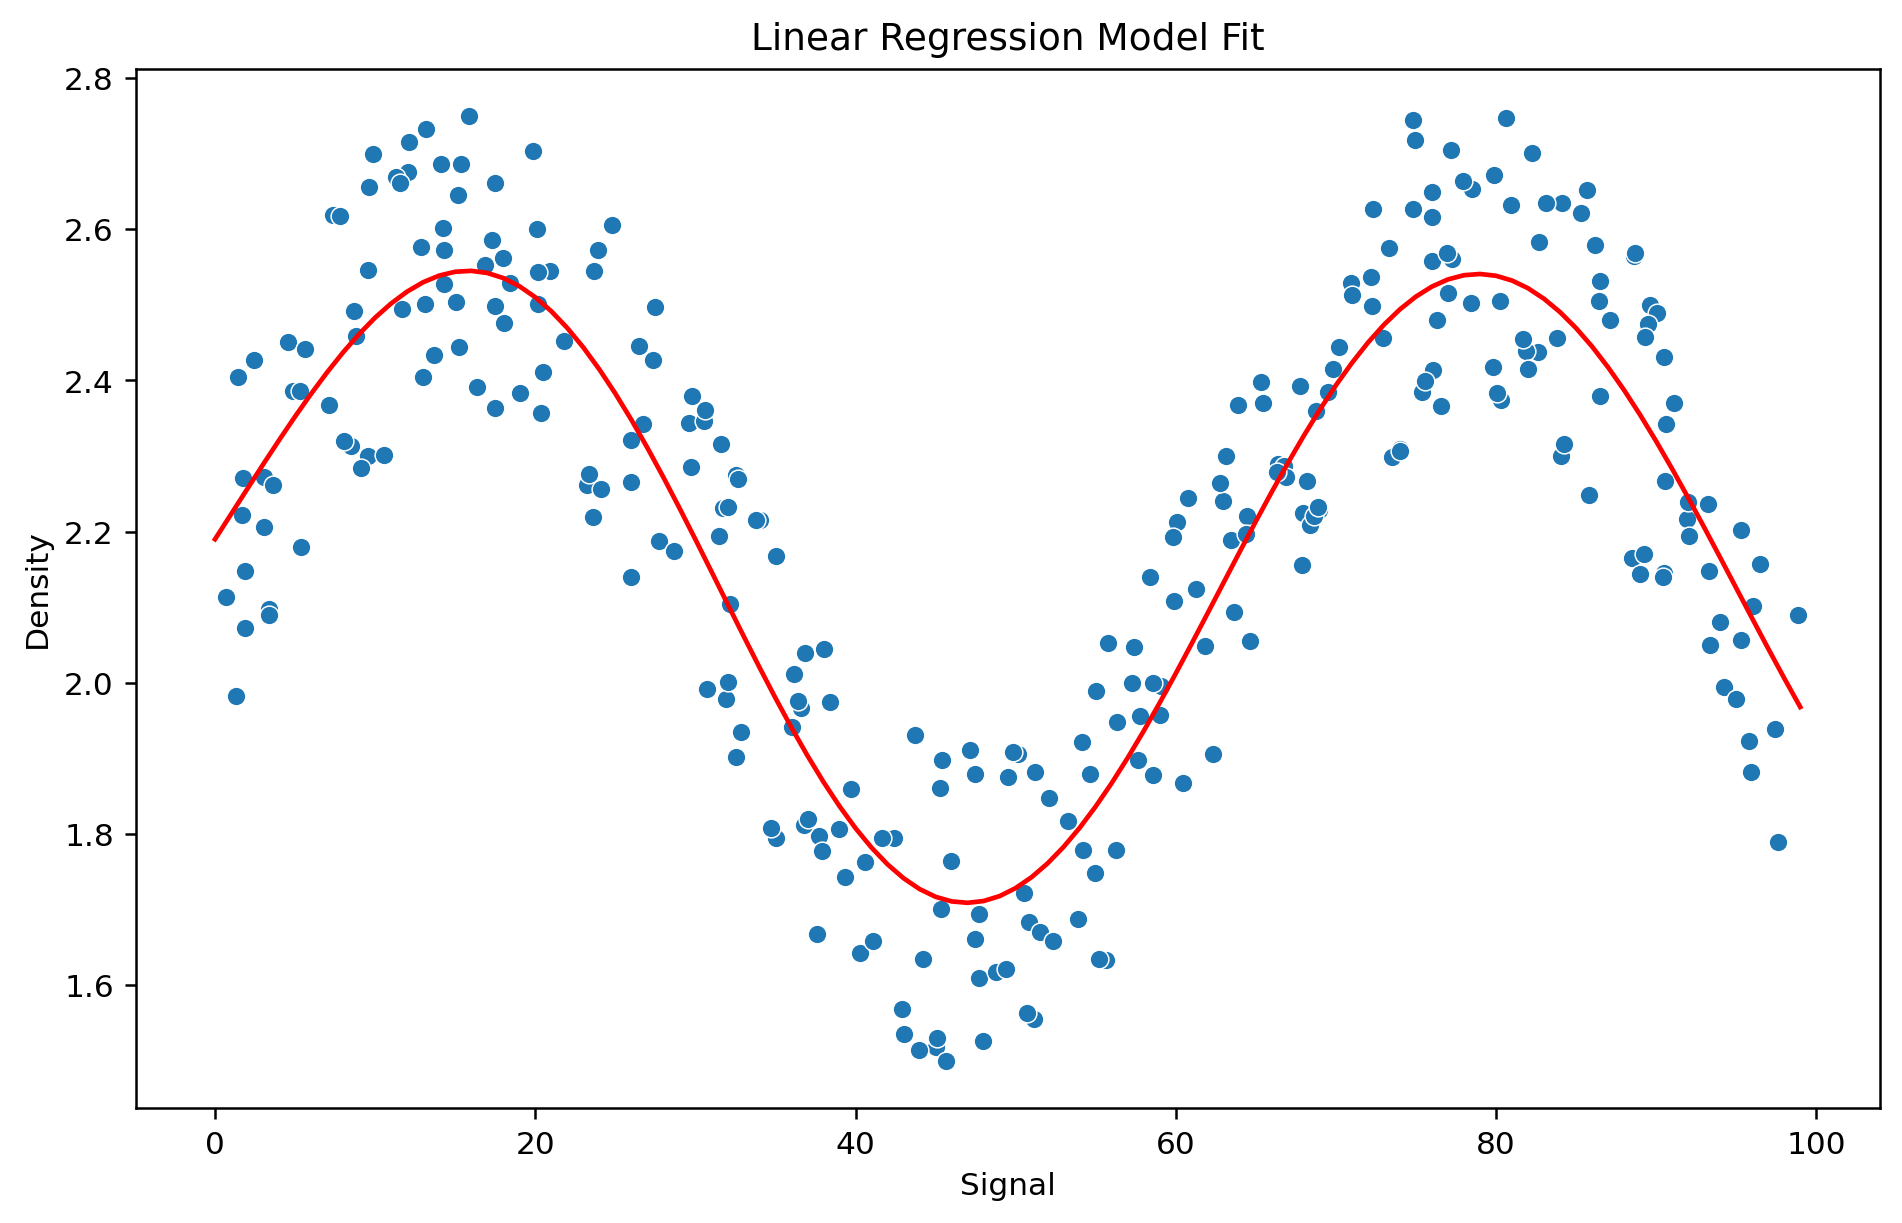

In [60]:
run_model(grid,X_train,y_train,X_test,y_test);

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rfr = RandomForestRegressor(n_estimators=10)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 0.137641807846681
MAE: 0.11736848916118907


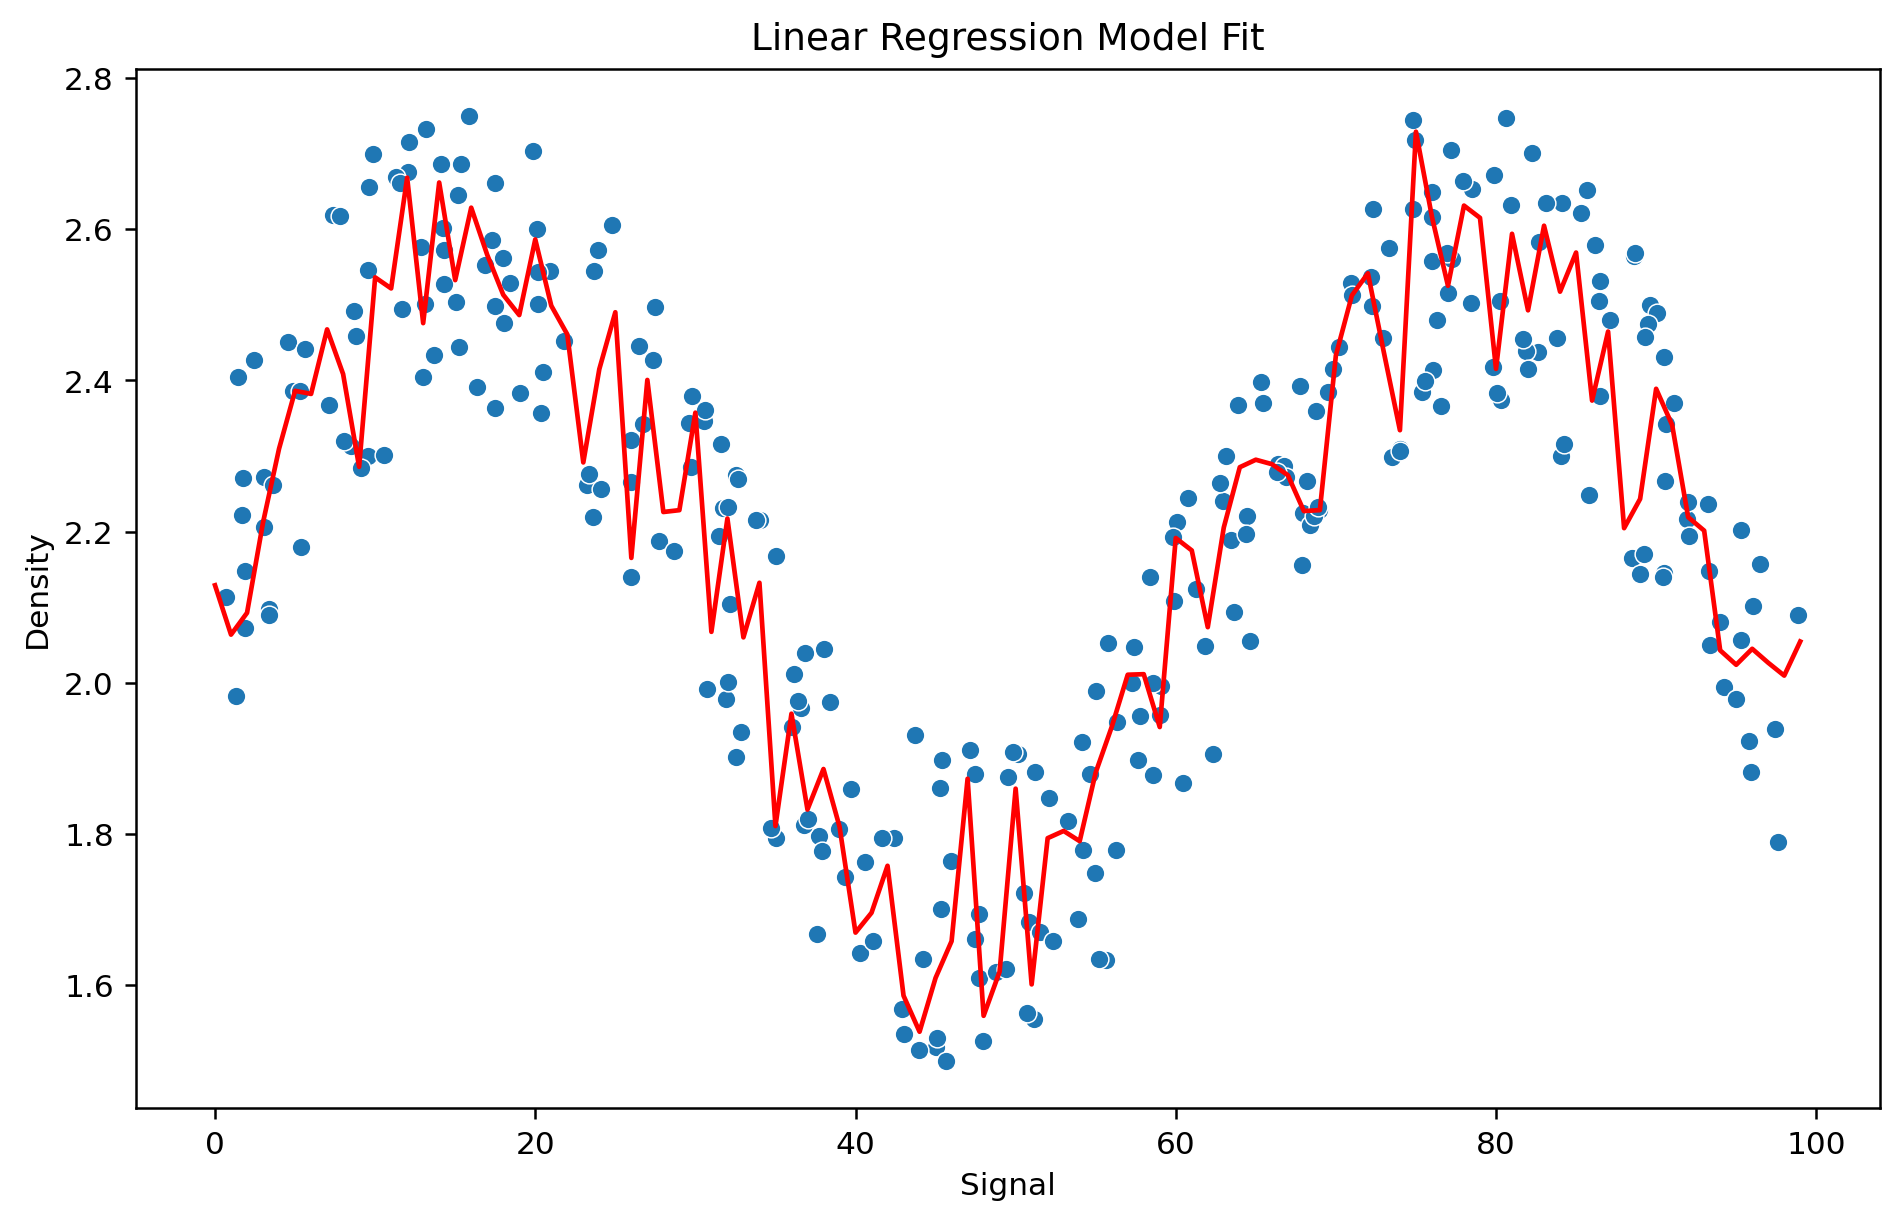

In [63]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [64]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

In [65]:
model = GradientBoostingRegressor()

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


RMSE: 0.13294148649584667
MAE: 0.11318284854800689


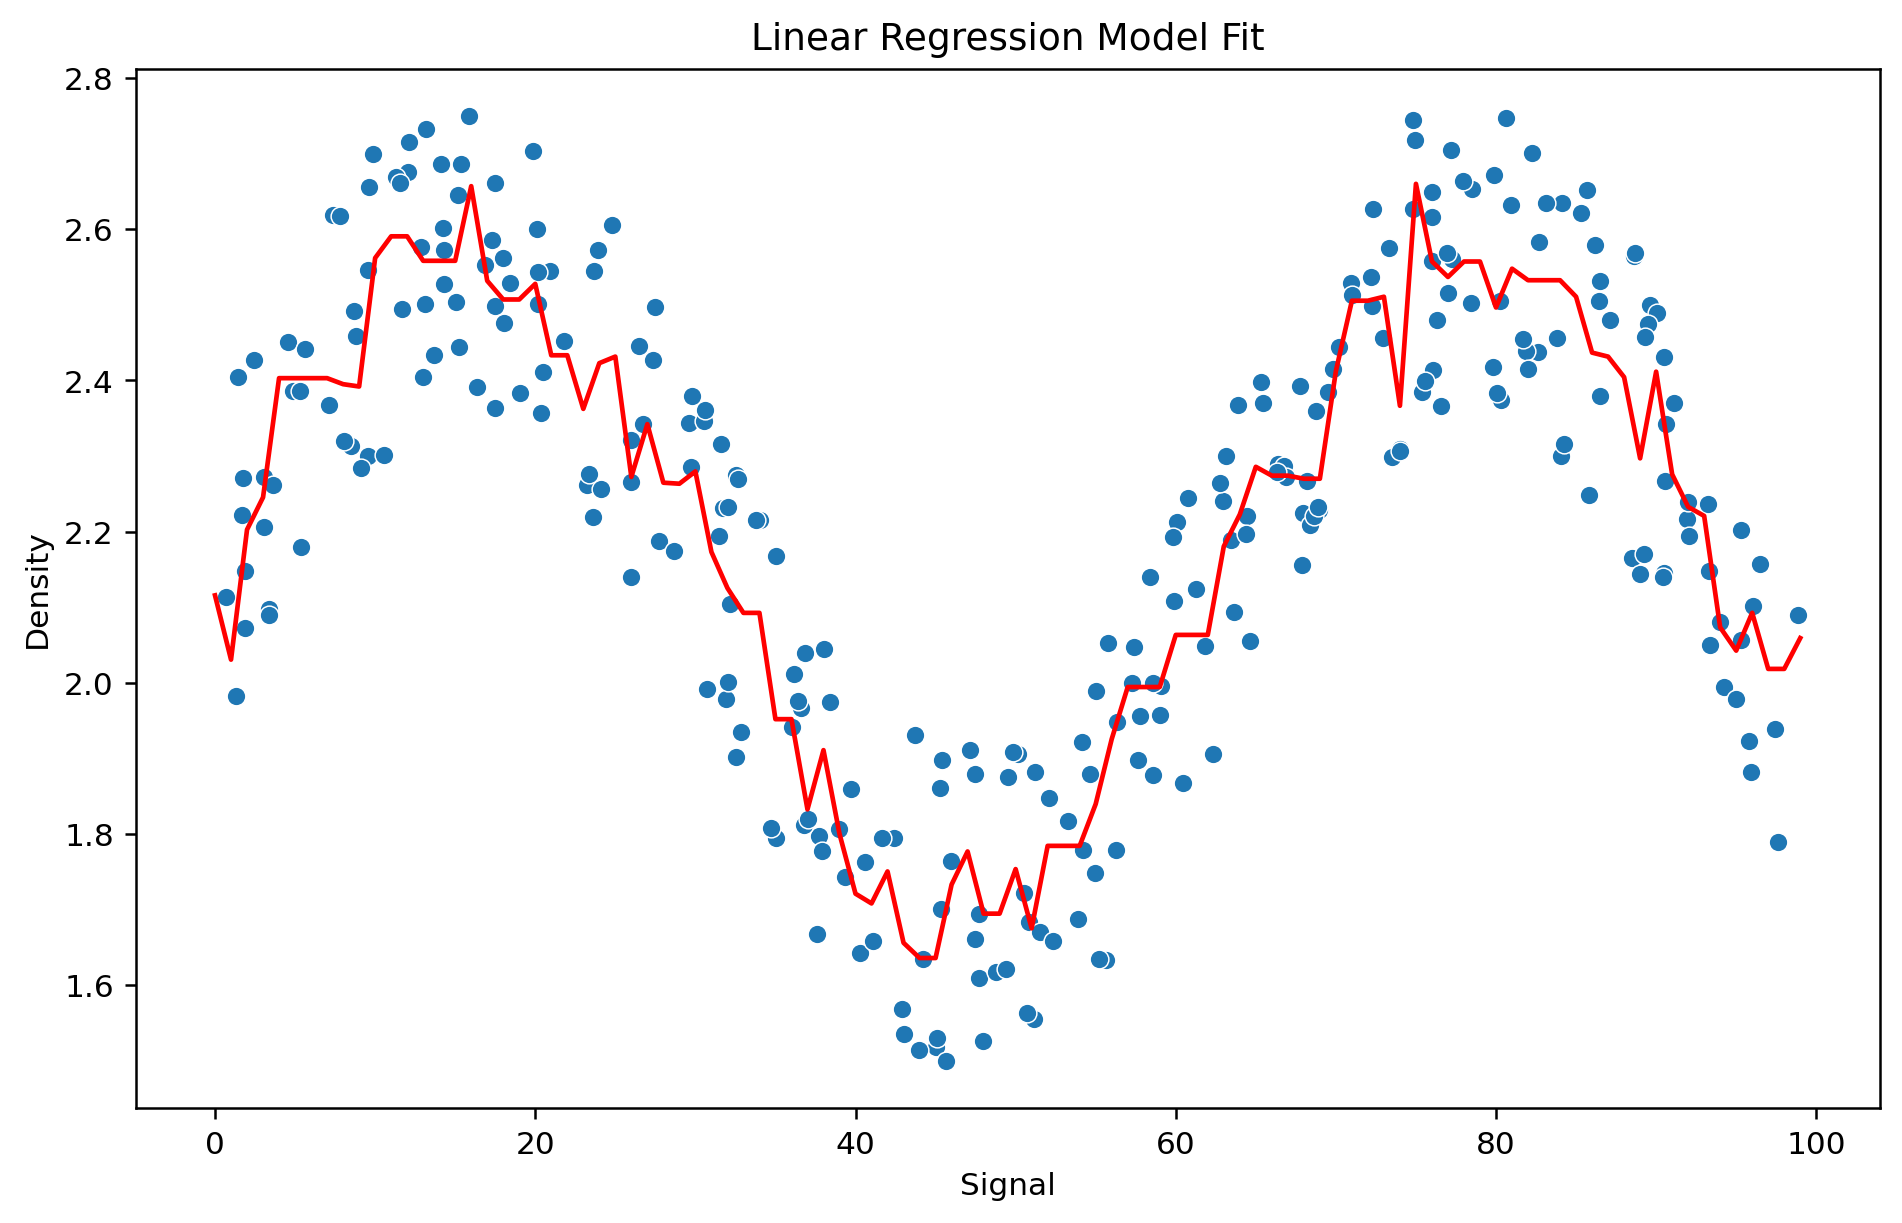

In [66]:
run_model(model,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.13822739422695415
MAE: 0.11766069057783023


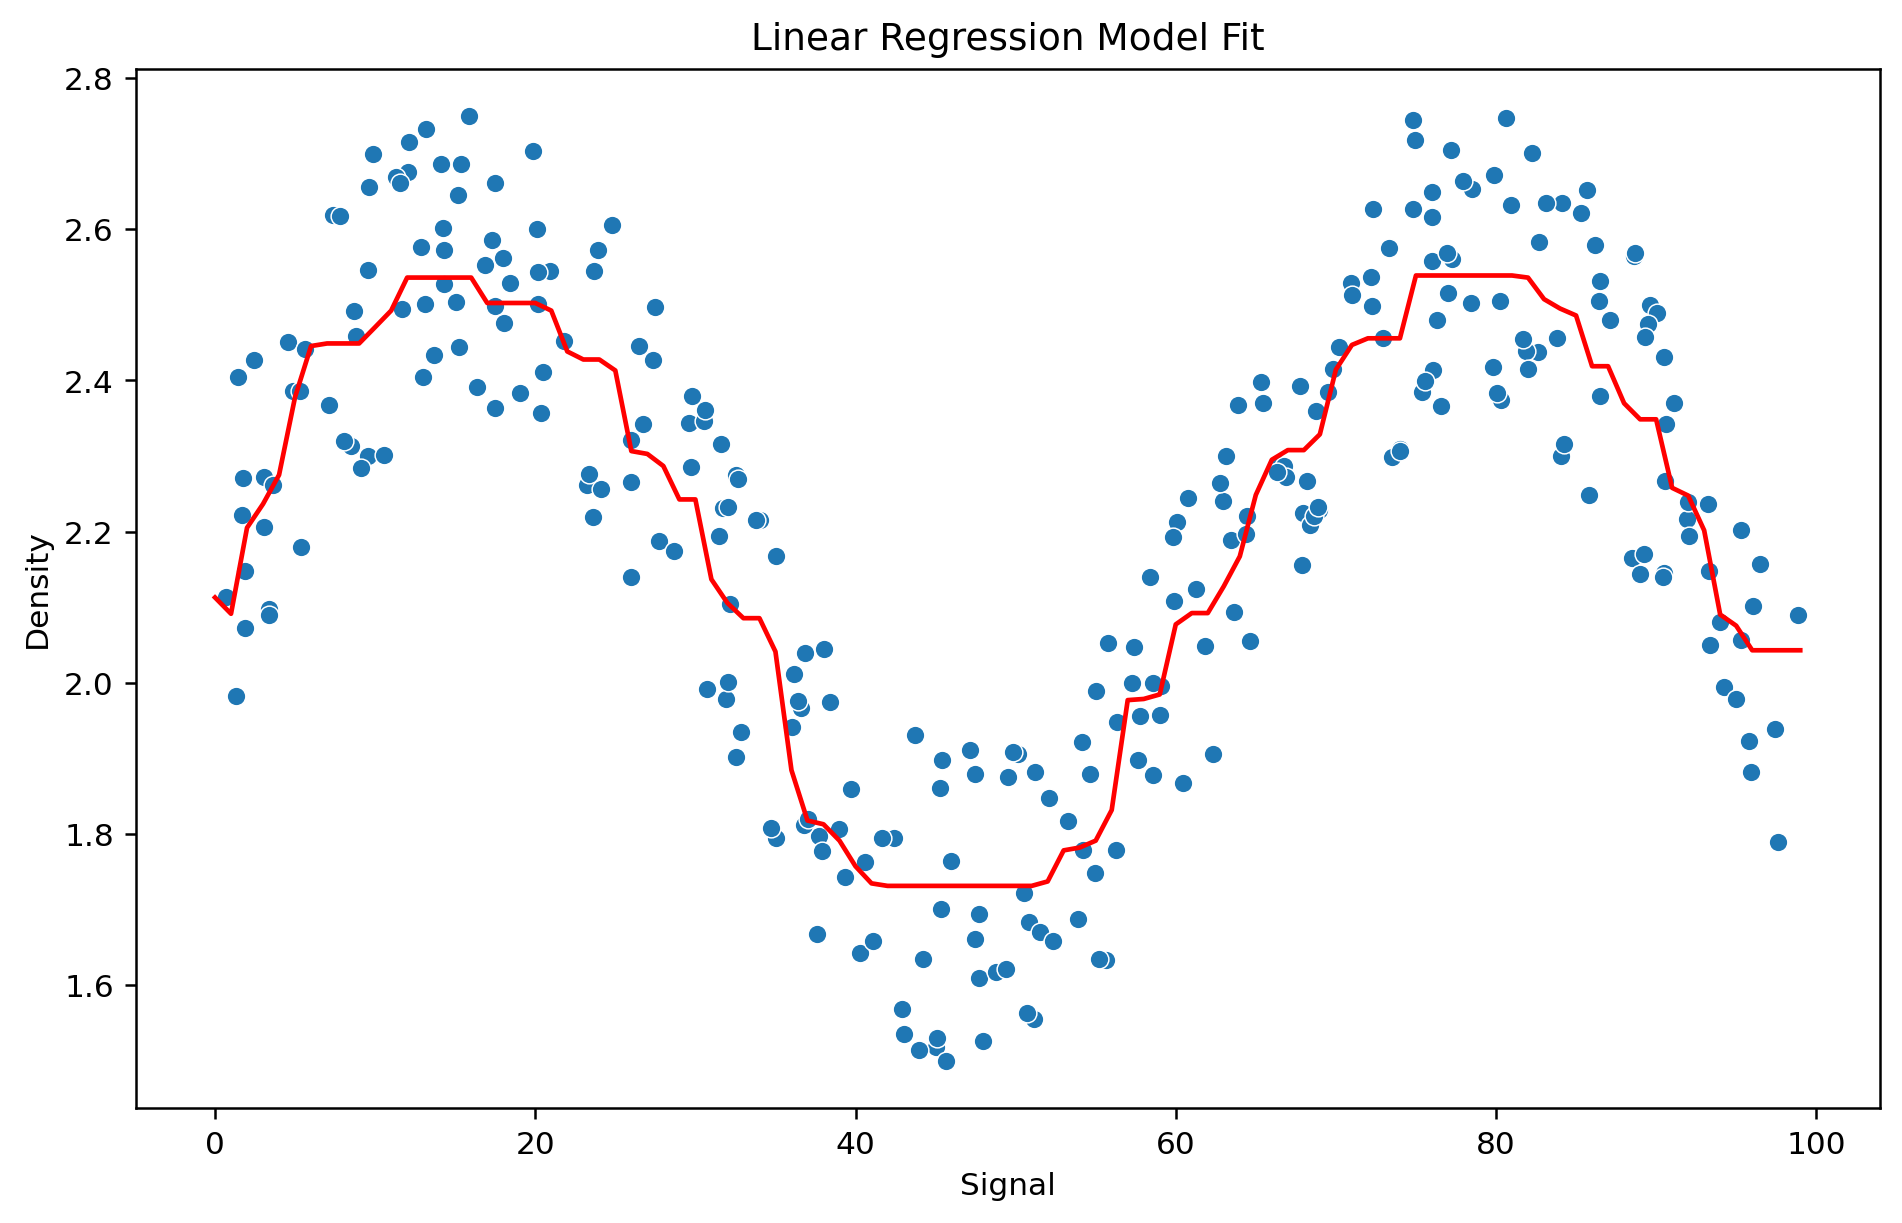

In [67]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)